In [1]:
# Import dstools (absolute path required, please change to your systems settings)
import importlib
import sys

path = '/dstools-master/dstools/__init__.py'
name = 'dstools'

spec = importlib.util.spec_from_file_location(name, path)
module = importlib.util.module_from_spec(spec)
sys.modules[spec.name] = module
spec.loader.exec_module(module)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from dstools.datasets import usarrests

# Zentrierung vs. Standardisierung

In diesem Notebook betrachten wir die Auswirkung der Zentrierung und Standardisierung auf die PCA. Wir berechnen dazu die Kovarianzmatrix und die PCA für nicht-transformierte, zentrierte und Standardisierte Daten. Als Datensatz nehmen wir  USArrests aus den dstools.

In [3]:
df = usarrests()
X = df.for_pca()
X.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [4]:
# Centered data
X_ctd = X - X.mean()

# Standardized data
X_std = (X - X.mean())/X.std()

In [5]:
# Raw data
pca = PCA()
princComp = pca.fit_transform(X)

# Centered data
pca_ctd = PCA()
princComp_ctd = pca_ctd.fit_transform(X_ctd)

# Standardized data
pca_std = PCA()
princComp_std = pca_std.fit_transform(X_std)

In [6]:
df = pd.DataFrame(data=X.var(), columns=['X Var'])
df['X Mean'] = X.mean().round()
df['X_ctd Var'] = X_ctd.var()
df['X_ctd Mean'] = X_ctd.mean().round()
df['X_std Var'] = X_std.var()
df['X_std Mean'] = X_std.mean().round()
df

,X Var,X Mean,X_ctd Var,X_ctd Mean,X_std Var,X_std Mean
Murder,18.970465,8.0,18.970465,-0.0,1.0,-0.0
Assault,6945.165714,171.0,6945.165714,0.0,1.0,0.0
UrbanPop,209.518776,66.0,209.518776,-0.0,1.0,-0.0
Rape,87.729159,21.0,87.729159,0.0,1.0,0.0


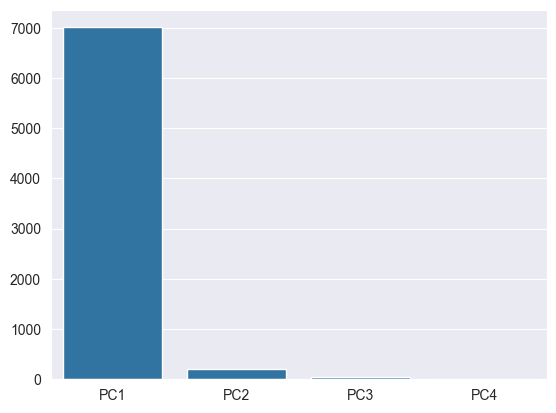

In [7]:
sns.barplot(x=['PC1','PC2', 'PC3','PC4'],y=pca.explained_variance_);

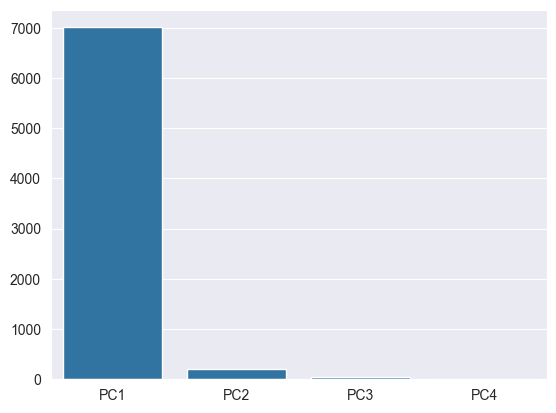

In [8]:
sns.barplot(x=['PC1','PC2', 'PC3','PC4'],y=pca_ctd.explained_variance_);

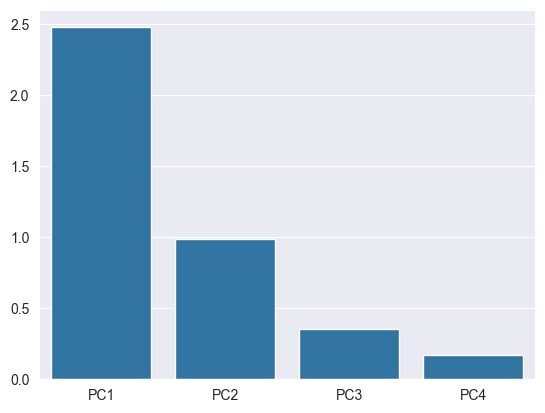

In [9]:
sns.barplot(x=['PC1','PC2', 'PC3','PC4'],y=pca_std.explained_variance_);